## Data cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
speech_df=pd.read_csv("reddit.csv")
speech_df

,id,text,hate_speech_idx,response,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5021,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5022,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5023,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_drop = [f"Unnamed: {i}" for i in range(4, 32)]

# Drop columns from DataFrame
speech_df.drop(columns_to_drop, axis=1, inplace=True)

In [4]:
speech_df.head()

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."


In [5]:
speech_df['response'][0]

'["I don\'t see a reason why it\'s okay to insult others based on their ethnic background.", \'Language people. You can express your ire respectfully and we insist that you do so. Thank you.\', \'Stop using mental impairments for insults on posts\']'

In [6]:
speech_df.describe()

,id,text,hate_speech_idx,response
count,5024,5021,3848,3847
unique,5019,5003,318,3838
top,1. e9ai3dh\n,1. What a cunt. \n,[1],"[""You're disturbingly obsessed with women."", '..."
freq,2,4,1739,3


In [7]:
speech_df.isnull().sum()

id                    1
text                  4
hate_speech_idx    1177
response           1178
dtype: int64

<Axes: >

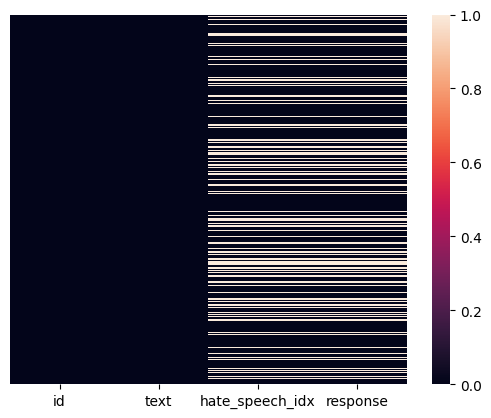

In [8]:
import seaborn as sns
sns.heatmap(speech_df.isnull(), yticklabels=False)
#if this graph is pure black then our data set is perfect....but

In [9]:
speech_df.dropna(how='all')

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5020,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5021,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,NaN,NaN
5022,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5023,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."


In [10]:
speech_df.ffill()

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,[3],['Persons with disabilities is the accepted te...
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5020,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5021,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,[8],['its inappropriate to use the word faggot as ...
5022,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5023,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."


In [11]:
speech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5024 non-null   object
 1   text             5021 non-null   object
 2   hate_speech_idx  3848 non-null   object
 3   response         3847 non-null   object
dtypes: object(4)
memory usage: 157.2+ KB
